# **Part B**

In [1]:
#import the libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

You have learnt about data augmentation in the theoretical assignment, Now you need to use it in the above dataset (You can do it using ImageDataGenerator

In [3]:
# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

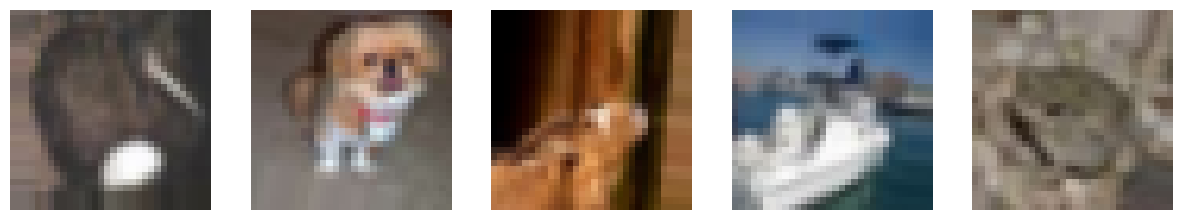

In [14]:
def visualize_augmented_images(datagen, images):
    it = datagen.flow(images, batch_size=1)
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        batch = it.next()
        image = batch[0].astype('uint8')
        ax[i].imshow(image)
        ax[i].axis('off')
    plt.show()

visualize_augmented_images(datagen, X_train[:5])

Use Visualization libraries to see how data augmentation works.

Train a CNN model of your choice and evaluate on the test data using weighted F1 scores ( Do not just try with a single model use multiple models, for example- one with transfer learning or with a different model architecture) at the end compare the performance of the models, and write what do you infer from the same

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_simple_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

simple_cnn = create_simple_cnn()

history_simple = simple_cnn.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=20, validation_data=(X_test, Y_test))


Epoch 1/20
547/547 [==============================] - 96s 173ms/step - loss: 2.3008 - accuracy: 0.0989 - val_loss: 1.7366 - val_accuracy: 0.0420
Epoch 2/20
547/547 [==============================] - 77s 141ms/step - loss: 1.7888 - accuracy: 0.1021 - val_loss: 1.5986 - val_accuracy: 0.0765
Epoch 3/20
547/547 [==============================] - 75s 137ms/step - loss: 1.6526 - accuracy: 0.0977 - val_loss: 1.3675 - val_accuracy: 0.0777
Epoch 4/20
547/547 [==============================] - 68s 125ms/step - loss: 1.5596 - accuracy: 0.0931 - val_loss: 1.3370 - val_accuracy: 0.0626
Epoch 5/20
547/547 [==============================] - 70s 128ms/step - loss: 1.4928 - accuracy: 0.0900 - val_loss: 1.3526 - val_accuracy: 0.0781
Epoch 6/20
547/547 [==============================] - 67s 122ms/step - loss: 1.4435 - accuracy: 0.0899 - val_loss: 1.2636 - val_accuracy: 0.0723
Epoch 7/20
547/547 [==============================] - 74s 134ms/step - loss: 1.4042 - accuracy: 0.0899 - val_loss: 1.1869 - val_ac

In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

resnet50_model = create_resnet50_model()

history_resnet50 = resnet50_model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=20, validation_data=(X_test, Y_test))


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
547/547 [==============================] - 249s 447ms/step - loss: 1.7968 - accuracy: 0.0995 - val_loss: 1.3303 - val_accuracy: 0.0922
Epoch 2/20
547/547 [==============================] - 245s 448ms/step - loss: 1.5251 - accuracy: 0.0954 - val_loss: 1.2644 - val_accuracy: 0.1081
Epoch 3/20
547/547 [==============================] - 206s 376ms/step - loss: 1.4452 - accuracy: 0.0966 - val_loss: 1.2162 - val_accuracy: 0.0952
Epoch 4/20
547/547 [==============================] - 244s 446ms/step - loss: 1.4122 - accuracy: 0.0931 - val_loss: 1.1938 - val_accuracy: 0.1002
Epoch 5/20
547/547 [==============================] - 210s 384ms/step - loss: 1.3810 - accuracy: 0.0995 - val_loss: 1.1695 - val_accuracy: 0.0941
Epoch 6/20
547/547 [==============================] - 244s 447ms/step - loss: 1.3592 - accuracy: 0.0975 - val_loss: 1.1665 - val_accuracy: 0.0895
Epoch 7/20
547/547 [==============================] - 244s 

In [20]:
from sklearn.metrics import f1_score

Y_pred_simple = np.argmax(simple_cnn.predict(X_test), axis=1)
f1_simple = f1_score(Y_test, Y_pred_simple, average='weighted')

Y_pred_resnet50 = np.argmax(resnet50_model.predict(X_test), axis=1)
f1_resnet50 = f1_score(Y_test, Y_pred_resnet50, average='weighted')

print("Weighted F1 Score (Simple CNN):", f1_simple)
print("Weighted F1 Score (ResNet50):", f1_resnet50)


313/313 [==============================] - 50s 155ms/step
Weighted F1 Score (Simple CNN): 0.6484285774554842
Weighted F1 Score (ResNet50): 0.6205169329342042


In [ ]:
# We observed that resnet50 has slightly lesser f1score than simple cnn. This suggests that being complex model doesn't always imply that it will perform better.